<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/2c2024/ICDIC_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 2: Inferencia Estadística
**Objetivos:** Con este trabajo práctico se busca que los alumnos comiencen a familiarizarse con las herramientas de inferencia estadística para la obtención de los parámetros de un modelo (en este caso, funciones de distribución de probabilidad) en base a datos. A tal fin, primero se revisarán conceptos de simulación de variables aleatorias y el uso del teorema de Bayes.

**Librerías:** En este trabajo se utilizará

*   Numpy: matemática básica y definición de matrices y vectores; simulación de variables aleatorias
*   Seaborn: construcción de gráficos
*   Bambi: Librería basada en PyMC para la inferencia estadística utilizando cadenas de Markov

También necesitaremos de la librería ArviZ para ver los resultados de nuestra inferencia, al igual que Numpy.






In [ ]:
# Instalación e import de Bambi
try:
  import bambi as bmb
except:
  !pip install bambi
  import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 642.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pandas as pd
import io

# para registrar el tiempo de corrida
import datetime

In [ ]:
start_datetime = datetime.datetime.now()

print('Inicio de corrida: ',start_datetime)

Inicio de corrida:  2024-09-12 17:44:09.836007


In [ ]:
def qqplot(x,y):
# FUNCION PARA GRAFICAR QQ-PLOTS
# x es el vector con los datos obtenidos mediante simulacion
# y es el vector con los datos muestras
# La funcion asume que el vector x tiene más elementos que el vector y

  from scipy.interpolate import interp1d
  from statsmodels.distributions.empirical_distribution import ECDF
  # Funciones acumuladas empíricas
  CDFx = ECDF(x)
  CDFy = ECDF(y)

  # Factores de Correccion
  Nx = len(CDFx.x)-1
  CDFx.y = CDFx.y*Nx/(Nx+1)
  Ny = len(CDFy.x)-1
  CDFy.y = CDFy.y*Ny/(Ny+1)

  # Interpolación lineal para CDFx
  CDFx_interp = interp1d(CDFx.y[1:],CDFx.x[1:])

  # Cuantiles de Y
  Qy = CDFy.x[1:]
  # Encontrar los cuantiles de de x asociados a los de y
  Qx = np.zeros(len(Qy))
  for i in range(len(Qy)):
    Qx[i] = CDFx_interp(CDFy.y[i+1])

  return Qx, Qy

In [ ]:
def plot_qqplot(X,y,n_sims,ax=None):
  # Graficar QQ-plot

  # Plot
  if ax == None:
    fig, ax = plt.subplots(figsize=(5,5))

  # Post predictives
  for i in range(n_sims):
    Qx, Qy = qqplot(np.ravel(X),np.reshape(np.ravel(X),(-1,len(y))).T[:,np.random.randint(0,len(np.reshape(np.ravel(X),(-1,len(y)))))])
    xmin = np.min([np.min(Qx),np.min(Qy)])
    xmax = np.max([np.max(Qx),np.max(Qy)])
    ax.plot( Qx, Qy, alpha=0.2, color='C0', linewidth=1.5)

  # Observed
  Qx, Qy = qqplot(np.ravel(X),y)
  xmin = np.min([np.min(Qx),np.min(Qy)])
  xmax = np.max([np.max(Qx),np.max(Qy)])
  ax.plot( Qx, Qy, color='k', linewidth=2)

  ax.plot([xmin,xmax],[xmin,xmax], color='C1', linestyle='--')
  ax.set_xlim(xmin,xmax)
  ax.set_ylim(xmin,xmax)
  ax.grid()
  ax.set_xlabel('Cuantiles Simulación')
  ax.set_ylabel('Cuantiles Muestras')
  #plt.show()

Grupo:

Integrantes:

*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX
*   Apellido, Nombres XXXXXX

## Ejercicio 1: Preguntas conceptuales

#### Actividad 1

**Actividad**: Usted tiene dos chapas de acero, con un modelo de generación de datos Normal donde $\sigma$ representa errores de medición en vez de dispersión de resultados (cada chapa fue medida por muchas personas distintas) y $\mu$ es el espesor de la chapa.

¿Qué haría para evaluar si las dos chapas tienen efectivamente distinto espesor?

**Su respuesta**:

#### Actividad 2

**Actividad**: Usted tiene dos dosificaciones de hormigón, con un modelo de generación de datos Normal donde $\sigma$ representa la dispersión de resultados (la máquina de ensayo es perfecta, se ensayaron varias probetas) y $\mu$ el valor medio de la resistencia

¿Qué haría para evaluar si los hormigones tienen resistencias tangiblemente distintas?

**Su respuesta**:

### Actividad 3

**Actividad**: Se quiere ajustar una función de distribución para la cantidad de tornados en la provincia de Santa Fe. Adoptando un modelo generación de datos Poisson, $y\sim Po(λ)$, ¿cuáles de las siguientes distribuciones podrían ser utilizadas como distribución a priori para el parámetro λ? La solución se va a obtener en forma numérica mediante MCMC

1. $\lambda \sim N(1,0.1)$
2. $\lambda \sim LN(0,0.1)$
3. $\lambda \sim exp(1)$
4. $\lambda \sim Unif(0,\infty)$
5. $\log(\lambda) \sim N(0,0.1)$

**Su respuesta**:

### Actividad 4

El siguiente gráfico muestra la distribución posterior de un parámetro $\pi$ del modelo, y la hipótesis H0 a validar definida por su ROPE (zona roja). La intención es validar o rechazar H0 con un mínimo de 90% de confianza. ¿Cuál de las siguientes afirmaciones es correcta?

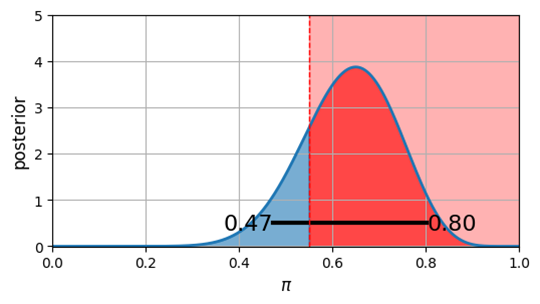

1. 	Los datos ya confirman H0 con >90% de confianza
2. 	Los datos ya rechazan H0 con >90% de confianza
3.  Debería recolectar más datos
4.  Debería modificar la distribución a priori de $\pi$

**Su respuesta**:

### Actividad 5

Ajustamos unos datos con un modelo lognormal $Y\sim LN(y|\mu,\sigma)$. La distribución posterior de los parámetros es discreta,

$$p\left(\mu,\sigma|\mathbf{y}\right) = \begin{cases}0.2 & si& \mu=0.5,&\sigma = 0.1 \\ 0.5 & si& \mu=0,&\sigma=0.04 \\ 0.3&si&\mu=-0.5&\sigma=1.0 \end{cases}$$

Prediga el valor medio de nuevas observaciones de y

**Su respuesta**:

In [ ]:
# Sus cuentas


## Ejercicio 2: Diversión con Variables Aleatorias

### Actividad 1

**Actividad**: Haga 10000 simulaciones de una variable aleatoria $X\sim N\left(\mu=2,\sigma=1\right)$ y calcule la media y el desvío estándar de las simulaciones para chequear el resultado. Guarde los resultados de la simulación en una variable `X`, y la media y desvio en las variables `mu_x` y `std_x`.

Media:  2.0063118870479664
Desvio:  0.9981267701716073


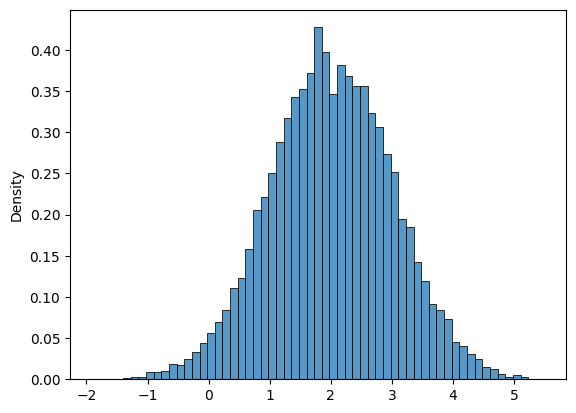

In [ ]:
n = 10000
rng = np.random.default_rng(0)

################################################################################
# CODIGO DEL ALUMNO
X =
mu_x =
std_x =
################################################################################

print('Media: ',mu_x)
print('Desvio: ', std_x)

sns.histplot(X,stat="density")
plt.show()

### Actividad 2

**Actividad**: Haga 1000 simulaciones de una variable aleatoria $\log{Y}\sim N\left(\mu=1,\sigma=0.4\right)$ (recuerde que esto significa que $Y$ sigue una distribución lognormal). Estime la media de $Y$

Media:  2.945316371898449


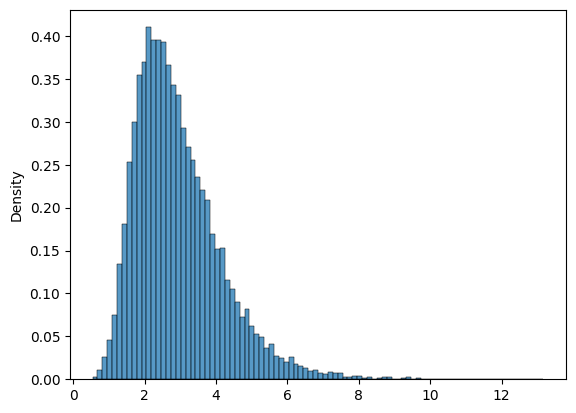

In [ ]:
################################################################################
# CODIGO DEL ALUMNO
Y =
mu_y =
################################################################################

print('Media: ',mu_y)

sns.histplot(Y,stat="density")
plt.show()

### Actividad 3

**Actividad**: ¿Cuál es la relación entre la media de $Y$ y los parámetros que debió incluir para simular la variable?

**Su respuesta**:

### Actividad 4

**Actividad**: Considerando $Z = X+Y$ calcule:


*   $P(Z>4)$ en `PZ4`
*   $P(Z>4|Y<2)$ en `PZ4Y2`
*   El valor medio de Z en `mu_z`

Pregunta 1
0.7194
Pregunta 2
0.35688405797101447
Pregunta 3
4.951628258946415


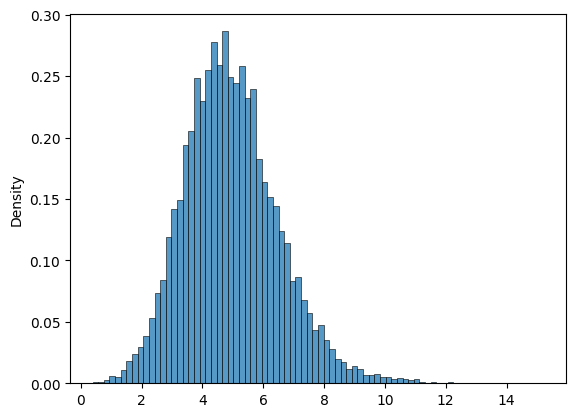

In [ ]:
################################################################################
# CODIGO DEL ALUMNO
Z =

PZ4 =

PZ4Y2 =

mu_z =
################################################################################

print('Pregunta 1')
print(PZ4)
print('Pregunta 2')
print(PZ4Y2)
print('Pregunta 3')
print(mu_z)

sns.histplot(Z,stat="density")
plt.show()

### Actividad 5

**Actividad**: ¿La variable $Z$ sigue alguna distribución en particular?

**Su respuesta**:

### Actividad 6

**Actividad**: Grafique función de probabilidad acumulada de $Z$ calcule $Z25$ tal que $P(Z<Z25)=0.25$ en `Z25`

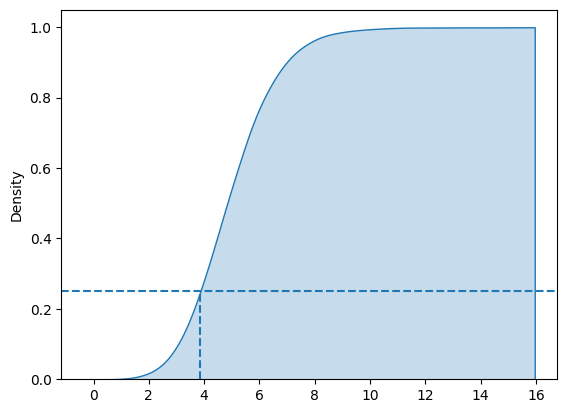

El cuantil 0.25 de Z es: 3.865878615563464


In [ ]:
################################################################################
# CODIGO DEL ALUMNO
Z25 =


################################################################################

plt.show()
print('El cuantil 0.25 de Z es:',Z25)

## Ejercicio 3: Teorema de Bayes

En un pueblo pequeño cercano a Mendoza, un terremoto de magnitud $M=6$ sacudió las edificaciones provocando un colapso. La primera pregunta que cualquier ingeniero se hace ante esta situación es ¿por qué?

Bueno, por un lado, sabemos que los edificios se diseñan aceptando cierta probabilidad de colapso. En este caso, podemos considerar que la probabilidad de colapso ($C=1$) de un edificio diseñado con el reglamento actual aprobado por el municipio es 5% ($R=1$) para un sismo de esta magnitud.

Mientras tanto, edificaciones viejas de mamposteria ($R=0$) son mucho más vulnerables. De un análisis no-lineal de este tipo de estructuras, se ha visto que la probabilidad de colapso ($C=1$) ante sismos de esta magnitud es de 20%.

$$P(C=1|R=0)=0.20$$

Por otro lado, el pueblo útlimamente ha sido centro de un enorme crecimiento por el aumento de trabajo en la región, por lo que la mayoría de las casas han sido construidas con posterioridad de la aprobación del reglamento. En particular, de 2000 casas en el pueblo, tan solo 100 son de mampostería tradicional ($R=0$).

En la radio del pueblo llaman a 3 personas discutir acerca del colapso y sus implicancias.

- **Carlos**: El hijo de 17 años de un abogado constiuticionalista que vive en la zona y está arrancando su carrera periodística.
- **Juana**: Una ingeniera estructural oriunda del pueblo que estudió en la Universidad Nacional de Cuyo.
- **Alexandra**: Una ingeniera estructural norteamericana que estudió en Cornell.

Cada uno de ellos tiene distinta información (algunos conocen el inventario de edificios del pueblo, otros tienen conocimiento respecto al comportamiento de la estructuras, etc.) pero tienen que responder la misma consulta: ¿Qué cree que pudo haber pasado con la estructura colapsada?

O, dicho de otra manera, ¿la estructura que colapsó es de mampostería o moderna según su intuición?

**NOTA**: Carlos, al no ser ingeniero, asigna igual probabilidad de colapso a cada tipo de estructura (solo mira qué tipo de estructura es más probable). Alexandra, al no conocer el pueblo, asigna igual probabilidad de que una estructura sea nueva o vieja (solo mira qué tipo de estructura tiene más chances de colapsar en el vacío). Juana usa toda la información disponible

### Actividad 1

**Actividad**: Para cada una de las 3 personas, escriba su opinión en forma automática respecto a qué edificio a colapsado (con un `if` por ejemplo):

- "Carlos opina que la estructura colapsada es de mampostería" o
- "Carlos opina que la estructura colapsada es reciente"

E incluya el cálculo de probabilidad realizado. Este es su primer modelo de predicción de su cursada!

*NOTA*: La decisión pueden hacerla comparando probabilidades en términos absolutos o relativos.

*NOTA 2*: Recuerden el teorema de Bayes cuando sea aplicable.

In [ ]:
# CODIGO DEL ALUMNO ============================================================























# ==============================================================================

Carlos opina que la estructura colapsada es reciente, P = 0.05
Juana opina que la estructura colapsada es reciente, P = 0.1739130434782609
Alexandra opina que la estructura colapsada es de mampostería, P = 0.8


### Actividad 2

Durante la mesa de debate el conductor comenta que entre los escombros se encontraron restos de asbesto ($A=1$) y que según el último censo 3 de cada 4 edificaciones tradicionales fueron construidas con asbesto ($R=0$), mientras que solo 1 de cada 10 estructuras construidas desde la adopción reglamentaria ($R=1$) presentaban este material.

¿Cómo actualiza esto las probabildades de que la estructura colapsada sea una efdicación antigua para cada panelista?

**Actividad**: Actualice el ejercicio anterior con la nueva información provista, aplicando el teorema de Bayes.

In [ ]:
# CODIGO DEL ALUMNO ============================================================
























# ==============================================================================

Carlos opina que la estructura colapsada es reciente, P = 0.28301886792452835
Juana opina que la estructura colapsada es de mampostería, P = 0.6122448979591837
Alexandra opina que la estructura colapsada es de mampostería, P = 0.967741935483871


### Actividad 3

**Actividad**: Repita el ejercicio para Juana pero considerando la probabilidad de que el edificio sea antiguo considerando la la presencia de asbesto primero, y luego aplicando bayes para considerar el colapso (es decir, invirtiendo el orden de llegada de la información)

¿Por qué termina dando lo mismo?

In [ ]:
# CODIGO DEL ALUMNO ============================================================








# ==============================================================================

Juana opina que la estructura colapsada es de mampostería, P = 0.6122448979591838


**Su respuesta**:

## Ejercicio 3: Evaluación de un tratamiento para el hormigón (Analítico)

Una empresa constructora quiere evaluar un nuevo proceso de curado y ver si tiene un efecto en la resistencia del hormigón. Para ello se tienen 7 pares de ensayos de probetas, unos con y otros sin tratamiento.

La empresa tiene las siguientes preguntas:

- ¿Los hormigones son distintos entre sí debido al tratamiento?
- ¿Cuál es la resistencia característica del hormigón según el tratamiento?
- ¿Puedo asegurar una mejora de $2MPa$ en la resistencia del hormigón por efecto del tratamiento?

El objetivo del ejercicio es contestar estas preguntas.

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving hormigones_tratamiento_tp2.csv to hormigones_tratamiento_tp2.csv


In [ ]:
#Se crea un DataFrame
df = pd.read_csv(io.BytesIO(uploaded['hormigones_tratamiento_tp2.csv']))
df

,Resistencia,Tratamiento
0,30.9,No
1,33.3,No
2,33.5,No
3,36.2,No
4,37.2,No
5,37.6,No
6,38.2,No
7,34.2,Si
8,37.1,Si
9,39.6,Si


### Actividad 1

**Actividad**: Calcule el valor medio y el desvío estandar (muestral) de los hormigones con y sin tratamiento. Indique la cantidad de muestras de cada uno.

In [ ]:
# Cantidad de muestras
N = len(df)
print('Numero de muestras totales',N)

# Hormigón sin tratar
# CODIGO DEL ALUMNO ============================================================
h0_mean =
h0_std =
N0 =
# ==============================================================================

# Hormigón con tratamiento
# CODIGO DEL ALUMNO ============================================================
h1_mean =
h1_std =
N1 =
# ==============================================================================

print('Sin Tratamiento:',N0,'muestras')
print('Media',h0_mean,'desvio',h0_std)
print('Con Tratamiento:',N1,'muestras')
print('Media',h1_mean,'desvio',h1_std)

Numero de muestras totales 14
Sin Tratamiento: 7 muestras
Media 35.271428571428565 desvio 2.7299049346783053
Con Tratamiento: 7 muestras
Media 39.699999999999996 desvio 3.234192325759245


Debiera ver una diferencia de más de $4MPa$ en el valor medio.

### Respondiendo la pregunta 1

Nuestra pregunta es:
- ¿Los hormigones son distintos entre sí debido al tratamiento?

Traducido a Ciencia de Datos la respuesta viene dada por:
- ¿Son los parámetros del modelo distintos en función del tratamiento?

En particular, vamos analizar si los valores medios (uno de los parámetros) se vio modificado.

#### Actividad 2

**Actividad**: Asumiendo una distribución a priori no-informativa, un modelo de generación de datos Normal y estudiando cada hormigón por separado:

1. ¿Qué distribución sigue la posterior del valor medio de cada hormigón?

**Su respuesta**:

#### Actividad 3

**Actividad**: Mediante simulación, compare los valores medios y obtenga el intervalo de confianza de 90% para la diferencia entre valores medios

NOTA: lo pueden obtener con `az.hdi` al intervalo de confianza si quieren el de máxima densidad, o con cuantiles si quieren uno simétrico.

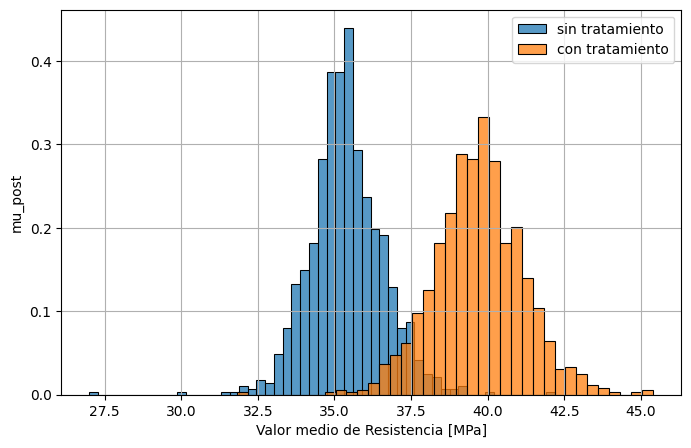

In [ ]:
n = 1000
rng = np.random.default_rng(100)

# Paso 1: simulacion
# CODIGO DEL ALUMNO ============================================================
m0_pred =
m1_pred =
# ==============================================================================

fig = plt.figure(figsize=(8,5))
sns.histplot(m0_pred, stat='density',label='sin tratamiento')
sns.histplot(m1_pred, stat='density',label='con tratamiento')

plt.grid()
plt.xlabel('Valor medio de Resistencia [MPa]')
plt.ylabel('mu_post')
plt.legend()
plt.show()

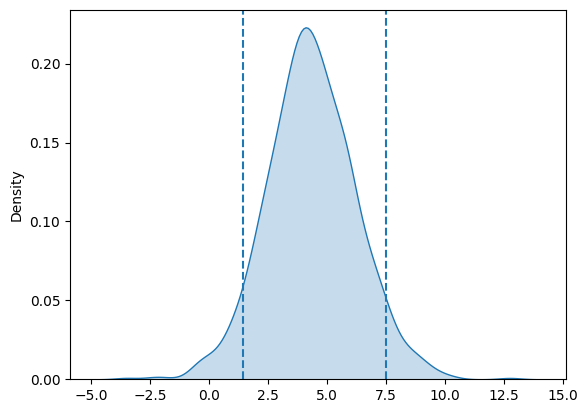

El intervalo de confianza 90% de la diferencia entre valores medios es [1.42959794 7.48871376]


In [ ]:
# Paso 2: Generar simulaciones de la diferencia

# CODIGO DEL ALUMNO ============================================================
mudiff =
# ==============================================================================

# Paso 3: Intervalos de Confianza

# CODIGO DEL ALUMNO ============================================================
d05,d95 =
# ==============================================================================

fig, ax = plt.subplots()
sns.kdeplot( mudiff, fill=True )
ax.axvline( x=d05, linestyle='--' )
ax.axvline( x=d95, linestyle='--' )
plt.show()

print('El intervalo de confianza 90% de la diferencia entre valores medios es',np.array([d05,d95]))

#### Actividad 4

Para verificar si los hormigones son diferentes entre sí, vamos a evaluar si podemos decir que los parámetros de su model (en particular, el valor medio en este caso) son distintos.

**Actividad**: Definiendo una región de equivalencia práctica (ROPE), grafique y calcule la diferencia en los valores medios con y sin tratamiento. ¿El tratamiento tiene efecto?

NOTA: puede utilizar la función `az.plot_posterior` indicando el ROPE deseado para el análisis.

In [ ]:
# CODIGO DEL ALUMNO ============================================================



# ==============================================================================

**Su respuesta**:

### Respondiendo la pregunta 2

Nuestra pregunta es:
- ¿Cuál es la resistencia característica de los hormigones según el tratamiento?

Traducido a Ciencia de Datos la respuesta viene dada por:
- ¿Cuál es el cuántil 0.05 de mi distribución posterior predictiva?

Es decir, estaré analizando por separado las variables aleatorias "resultado de una probeta" según el tratamiento.

#### Actividad 5

**Actividad**: Asumiendo una distribución a priori no-informativa, un modelo de generación de datos Normal y estudiando cada hormigón por separado:

1. ¿Qué distribución siguen las predicciones sobre la resistencia de cada hormigón (posterior predictiva)?
2. ¿Difiere del modelo del cual se originaron los datos? ¿Por qué sí/no?

**Su respuesta**:

#### Actividad 6

**Actividad**: Simule 1000 muestras de los hormigones con y sin tratamiento en las variables `h0_pred` y `h1_pred`.

NOTA: Indique claramente los parámetros de la función de distribución, y lea detenidamente la documentación de Numpy para incoporarlos correctamente en la simulación.

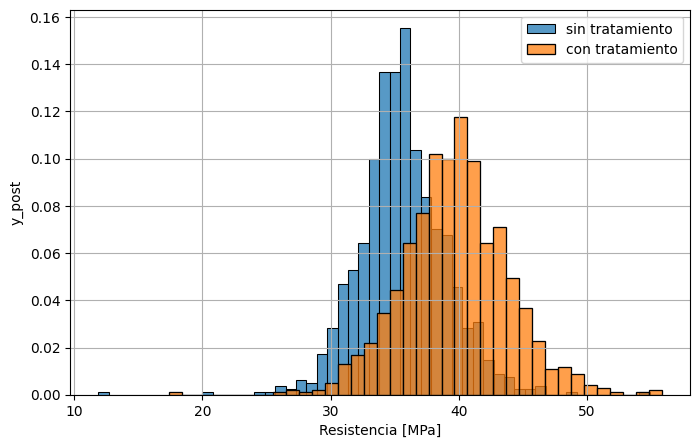

In [ ]:
# Predictiva de las resistencias
n = 1000
rng = np.random.default_rng(100)

# CODIGO DEL ALUMNO ============================================================
h0_pred =
h1_pred =
# ==============================================================================

fig = plt.figure(figsize=(8,5))
sns.histplot(h0_pred, stat='density',label='sin tratamiento')
sns.histplot(h1_pred, stat='density',label='con tratamiento')

plt.grid()
plt.xlabel('Resistencia [MPa]')
plt.ylabel('y_post')
plt.legend()
plt.show()

#### Actividad 7

**Actividad**: Calcule la resistencia característica (valor con 95% de probabilidad de excedencia) de los hormigones.

In [ ]:
fc0 = []
fc1 = []

# CODIGO DEL ALUMNO ============================================================
fc0 =
fc1 =
# ==============================================================================

print('Sin tratamiento:', fc0,'MPa')
print('Con tratamiento:', fc1,'MPa)')

Sin tratamiento: 30.42297109523148 MPa
Con tratamiento: 33.09219812119197 MPa)


### Respondiendo la pregunta 3


Nuestra pregunta es:
- ¿Puedo asegurar una mejora de $2MPa$ en la resistencia del hormigón por efecto del tratamiento?

Traducido a Ciencia de Datos la respuesta viene dada por:
- Si yo comparo dos hormigones cualesquiera con y sin tratamiento, ¿cuál es la probabilidad de que la diferencia de resistencia al ensayar las probetas sea mayor a $2MPa$?

Es decir, estoy estudiando la variable aleatoria "diferencia entre probetas individuales"

#### Actividad 8

**Actividad**: Guarde las simulaciones de la diferencia entre hormigones en `rdiff`, calcule la probabilidad de que la diferencia sea mayor o igual a 2 e indique si cumple con el criterio propuesto de significidad (probabilidad mayor a 90%). Calcule también los intervalos de confianza.

Primero les pedimos que calculen la probabilidad a mano. Luego, pueden hacerlo gráficamente con `ArviZ` y seteando el ROPE apropiado a la pregunta.

In [ ]:
# Generar simulaciones de la diferencia

# CODIGO DEL ALUMNO ============================================================
rdiff =
# ==============================================================================

# Probabilidad de que h2 - h1 > 2

# CODIGO DEL ALUMNO ============================================================
Pefecto =
# ==============================================================================

print('La probabilidad de que el hormigón con tratamiento sea 2MPa más resistente es',Pefecto)

La probabilidad de que el hormigón con tratamiento sea 2MPa más resistente es 0.66


In [ ]:
# CODIGO DEL ALUMNO ============================================================




# ==============================================================================

**Su respuesta**:

### Cerrando

#### Actividad 9

**Actividad**: ¿Por qué puede ser que la resistencia característica o el valor medio de los hormigones sea tan marcada, pero que la diferencia entre dos probetas cualesquiera tenga mucha variabilidad?

**Su respuesta**:

## Ejercicio 4: Período de retorno de lluvias en CABA

En este último ejercicio queremos obtener el período de retorno de precipitaciones mensuales en CABA.
La pregunta, entonces, es:

- ¿Qué valor de lluvia acumulada mensual es superado (en promedio) una vez cada 100 años?

Para ello tenemos un dataset de $mm$ de la lluvia mensual de los últimos 30 años de la ciudad (1991-2020). El problema es que no sabemos bien todavía con qué modelo contestar esa pregunta.

### Curado del dataset (Lo han visto en TP0 y TP1)

Primero, importamos el archivo `historico_precipitaciones-CABA.csv` en Google Colab.

In [ ]:
# Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving historico_precipitaciones-CABA.csv to historico_precipitaciones-CABA.csv


In [ ]:
# Se crea un DataFrame
df = pd.read_csv(io.BytesIO(uploaded['historico_precipitaciones-CABA.csv']))
df.head()

,ano,mes,mm,dias
0,1991,Enero,190.0,7
1,1991,Febrero,30.5,6
2,1991,Marzo,55.0,8
3,1991,Abril,125.6,12
4,1991,Mayo,68.4,7


In [ ]:
# Crear columna con datetime
lista_meses = df['mes'].unique()
mes_num = df.apply (lambda row: np.where(row['mes']==lista_meses)[0][0]+1, axis=1)
df['fecha'] = pd.to_datetime(df['ano'].astype(str) + mes_num.astype(str), format='%Y%m')
df = df.set_index('fecha')
df.iloc[:12]

,ano,mes,mm,dias
fecha,,,,
1991-01-01,1991,Enero,190.0,7
1991-02-01,1991,Febrero,30.5,6
1991-03-01,1991,Marzo,55.0,8
1991-04-01,1991,Abril,125.6,12
1991-05-01,1991,Mayo,68.4,7
1991-06-01,1991,Junio,119.7,10
1991-07-01,1991,Julio,89.3,8
1991-08-01,1991,Agosto,66.4,7
1991-09-01,1991,Septiembre,85.5,10


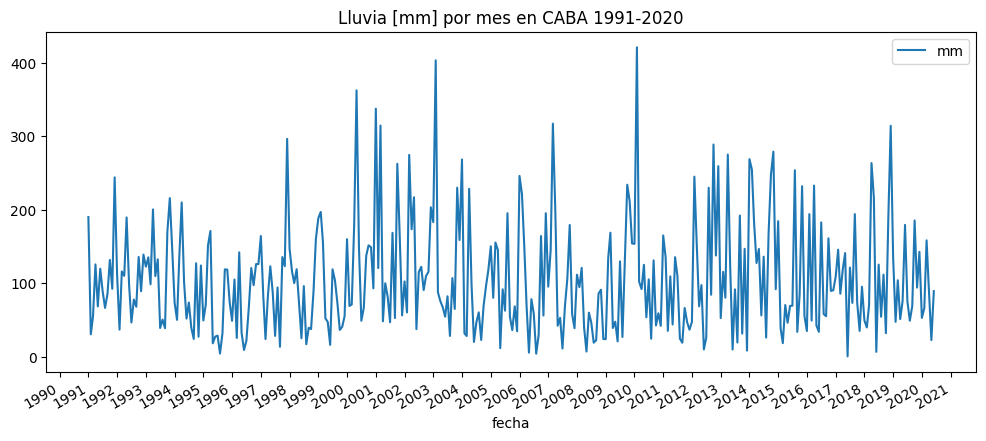

In [ ]:
import matplotlib.dates as mdates
# Grafico
ax = df.plot( y='mm', figsize=(12,5), x_compat=True )
ax.xaxis.set_major_locator(mdates.YearLocator()) # Poner labels solo en cada año
ax.xaxis.set_major_formatter( mdates.DateFormatter("%Y") ) # Formatear label
plt.title('Lluvia [mm] por mes en CABA 1991-2020');

In [ ]:
# Datafarme de maximos anuales
yearly_max = df.loc[df.groupby("ano")["mm"].idxmax()]#df.resample("Y").max()
yearly_max.head()

,ano,mes,mm,dias
fecha,,,,
1991-12-01,1991,Diciembre,244.0,16
1992-05-01,1992,Mayo,189.5,9
1993-11-01,1993,Noviembre,215.8,14
1994-04-01,1994,Abril,209.9,11
1995-04-01,1995,Abril,171.1,11


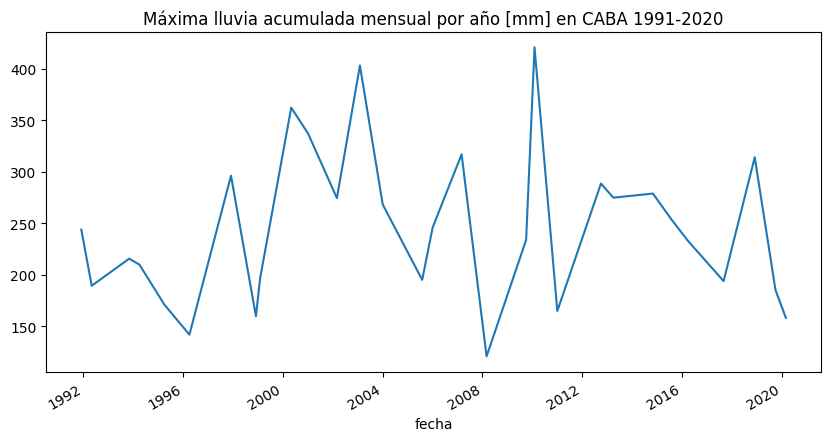

In [ ]:
# Grafico
ax = yearly_max.plot( y='mm', legend=False, figsize=(10,5), x_compat=True )
ax.xaxis.set_major_formatter( mdates.DateFormatter("%Y") ) # Formatear label # Formatear labels
plt.title('Máxima lluvia acumulada mensual por año [mm] en CABA 1991-2020');

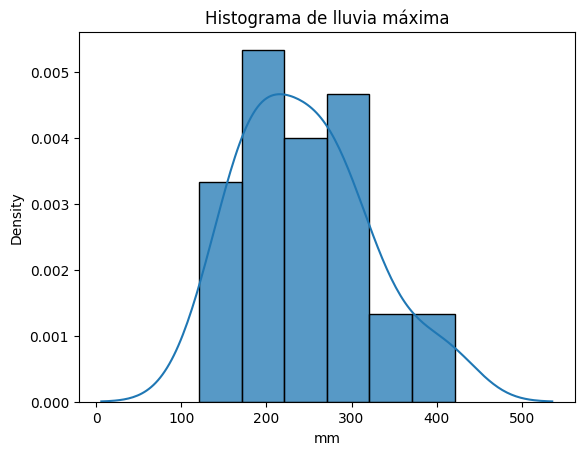

Valor promedio: 245.07 mm
Desvio 75.54 mm


In [ ]:
# Histograma
sns.histplot(data = yearly_max, x='mm', bins='sturges', stat='density').set(title='Histograma de lluvia máxima')
sns.kdeplot(data = yearly_max, x='mm')
plt.show()

print('Valor promedio:',yearly_max['mm'].mean(),'mm')
print('Desvio',np.round(yearly_max['mm'].std(ddof=1),2),'mm')

###Ajuste de una función de distribución para la máxima lluvia acumulada mensual por año

En este paso ajustarán una función de distribución para la máxima lluvia mensual en un año, ya que todavía no sabemos qué modelo de generación de datos es el "mejor".

#### Modelo de datos: Normal

En primer lugar, vamos a asumir (tenga sentido o no, ustedes podrán decidirlo en función del histograma) que los datos vienen de una distribución normal.

Para este modelo vamos a plantearlo y verlo en forma completa, para el resto iremos acortando caminos (verificaciones, visualizaciones) para no hacer tan largo el trabajo.

##### Actividad 1

**Actividad**: ¿Qué distribuciones a priori utilizaría para los parámetros $\mu$ y $\sigma$ del modelo Normal? Intente que sean poco informativas. Puede incluir si lo desea (o no) su conocimiento del tema, pero recuerde no hacerlo mirando los datos.

**Su respuesta**

##### Actividad 2

**Actividad**: Construya un modelo de inferencia asumiendo datos normales. Incluya en el modelo las distribuciones a priori elegidas, e indique explícitamente si está ajustando $\mu$ o alguna transformación de ella (es decir, defina usted el 'link')

In [ ]:
# CODIGO DEL ALUMNO ============================================================
# Definicion de Proris
priors =

# Model
model1 =
# ==============================================================================

# Ver el modelo
model1.build()
model1.graph()

##### Actividad 3

**Actividad**: Realice un "prior check". Es decir, verifique que sus distribuciones a priori, sin los datos, generan predicciones dentro del rango de valores que usted considera razonables para lluvias máximas en CABA.

In [ ]:
# Mostrar Distribuciones a Priori Elegidas
# CODIGO DEL ALUMNO ============================================================


# ==============================================================================

In [ ]:
# Hacer una evaluación de las distribuciones a priori

# CODIGO DEL ALUMNO ============================================================
# Generar simulaciones
priorcheck1 =

# Graficar


# ==============================================================================
plt.show()

**Actividad**: Modifique las distribuciones a priori hasta obtener el resultado deseado.

##### Actividad 4

**Actividad** Realice la inferencia estadística, y verifique que la misma se haya realizado en forma correcta (convergencia de cadenas).

In [ ]:
# CODIGO DEL ALUMNO ============================================================
# Hacer inferencia
results1 =

# MCMC diagnostic

# ==============================================================================

plt.show()

##### Actividad 5

**Actividad**: Muestre un resumen de la inferencia con la distribución posterior de los parámetros, y una tabla con sus valores medios e intervalos de confianza

In [ ]:
# Distribuciones a posteriori
# CODIGO DEL ALUMNO ============================================================




# ==============================================================================

##### Actividad 6

**Actividad**: Realice simulaciones del modelo, y grafique la posterior predictiva.

In [ ]:
# Simulaciones predictivas
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================

# Posterior predictiva
# CODIGO DEL ALUMNO ============================================================

# ==============================================================================
plt.show()

#### Modelo de datos: Logormal

Ahora vamos a "repetir" lo anterior para un modelo lognormal. Cómo ya hicimos todo el proceso una vez, no vamos a repetirlo en el TP. Simplemente nos vamos a ocupar de la definición del modelo. y de trabajar los datos simulados.

##### Actividad 7

**Actividad**: Construya un modelo de inferencia asumiendo datos normales. No hace falta que definen ustedes distribuciones a priori (confiemos en el default de `Bambi`)

NOTA: Si `Y` es lognormal, `log(Y)` es normal, así que tal vez sea más fácil hacer el ajuste en la formula para `log(Y)`

In [ ]:
# CODIGO DEL ALUMNO ============================================================
model2 =
# ==============================================================================

# Ver el modelo
model2.build()
model2.graph()

A continuación, dejamos el modelo corrido (sin las salidas simplemente para reducir espacio)

In [ ]:
# Inferencia
results2 = model2.fit(idata_kwargs={"log_likelihood": True})

# Posterior predictiva
model2.predict(results2, kind="response")

Output()

Output()

##### Actividad 8

Si mira los resultados dentro de `results2`, notará que el modelo generó simulaciones del logaritmo de las lluvias (en `posterior_predictive`. Esto es algo incómodo porque a fin de cuentas queríamos analizar las lluvias en `mm` y que todos los modelos sean comparables entre sí.

In [ ]:
results2

**Actividad**: Transforme, utilizando los métodos `map` y `rename` de la variable `results2`, las simulaciones de `log(mm)` a `mm` y cambie el nombre adecuadamente. Guarde las modificaciones en una nueva variable `results2Trans`.

In [ ]:
# CODIGO DEL ALUMNO ============================================================

# Transformar resultados de Y a escala deseada
results2Trans =

# Renombrar variable de log(mm) a mm luego de aplicar transformacion

# ==============================================================================

results2Trans

#### Modelo de datos: Gumbel

En el TP vamos a analizar dos modelos más. Para evitar ser repetitivos, no les pediremos que los carguen ustedes, pero si vean la sintaxis ya que pueden necesitarla a futuro.

Por ejemplo, a continuación pueden ver la carga de un modelo de Gumbel, para el cual se tuvo que crear manualmente la `familia`.

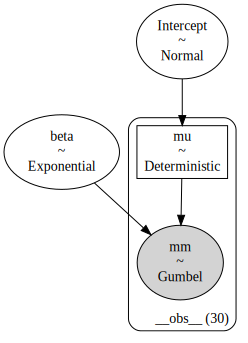

In [ ]:
# Construct likelihood distribution ------------------------------
# This must use a valid PyMC distribution name.
# 'parent' is the name of the variable that represents the mean of the distribution.
likelihood = bmb.Likelihood("Gumbel", params=["mu", "beta"], parent="mu")

# Set link function ----------------------------------------------
# 1. Pass a name that is known by Bambi
link = {"mu": "identity"}

# Construct the family -------------------------------------------
# Families are defined by a name, a Likelihood and a Link.
family = bmb.Family("gumbel", likelihood, link)

# Choose Priors (necessary for custom families) ------------------
priors = {"Intercept": bmb.Prior("Normal",mu=200,sigma=50),
  "beta": bmb.Prior("Exponential", lam=1/10)}

model3 = bmb.Model("mm ~ 1", yearly_max, family=family,priors=priors)

# Ver el modelo
model3.build()
model3.graph()

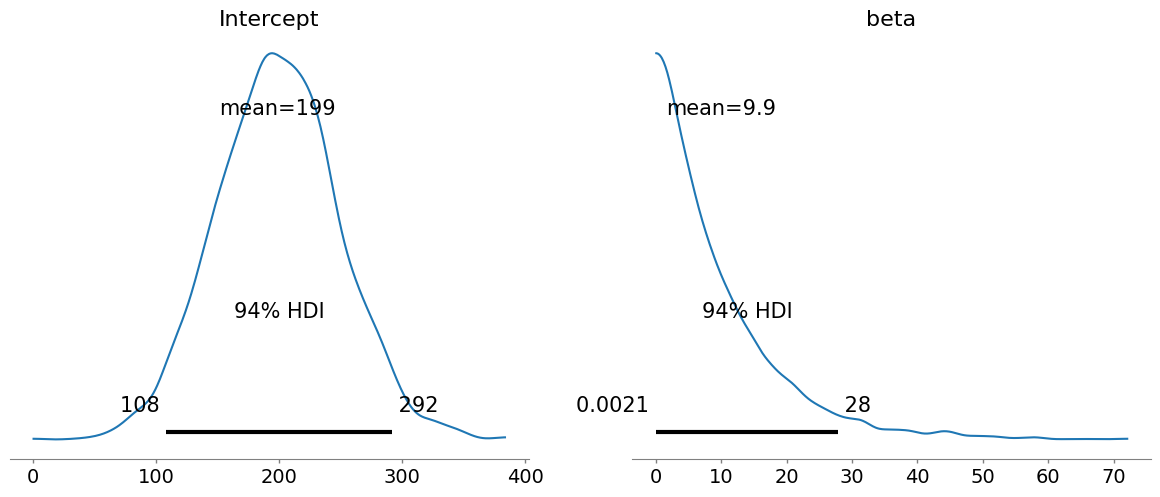

In [ ]:
# Mostrar Distribuciones a Priori
model3.plot_priors()
plt.show()

In [ ]:
# Inferencia
results3 = model3.fit(idata_kwargs={"log_likelihood": True})

# Posterior predictiva
model3.predict(results3, kind="response")

Output()

Output()

#### Modelo de datos: Weibull
Por último, dejamos también la construcción de un modelo Weibull

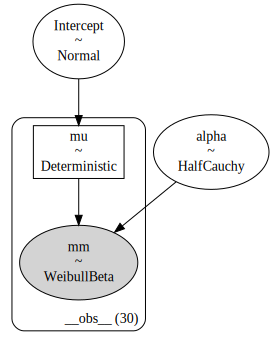

In [ ]:
model4 = bmb.Model("mm ~ 1", yearly_max, family='weibull')

# Ver el modelo
model4.build()
model4.graph()

In [ ]:
# Hacer inferencia
results4 = model4.fit(idata_kwargs={"log_likelihood": True})

# Simulaciones predictivas
model4.predict(results4, kind="response")

Output()

Output()

### Evaluación de Modelos

Recién construimos muchos modelos, pero, ¿cuál se ajusta mejor a los datos?

Podríamos empezar viendo cómo se compara el histograma de simulaciones (réplicas del experimento y posterior predictiva) con el histograma de datos, como se hizo en la última actividad del modelo normal

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,8),sharex=True)

# Normal
az.plot_ppc(results1,ax=ax[0,0])
ax[0,0].set_title('Normal')

# Lognormal
az.plot_ppc(results2Trans,ax=ax[0,1])
ax[0,1].set_title('Logormal')

# Gumbel
az.plot_ppc(results3,ax=ax[1,0])
ax[1,0].set_title('Gumbel')

# Weibull
az.plot_ppc(results4,ax=ax[1,1])
ax[1,1].set_title('Weibull')

plt.show()

##### Actividad 9

**Actividad**: ¿Ve algún modelo visiblemente inferior al resto que lo haría descartarlo?

**Su respuesta**:

##### Actividad 10

Para entender un poco mejor qué tanto se parecen y dónde los modelos pueden tener deficiencias, podemos construir QQ-plots

**Actividad**: Construya los QQ-plots para los 4 modelos candidatos con la función creada por nosotros `plot_qqplot`. Indique si ve en algunos modelos algún posible problema (en la simetría, desvío, valor medio, peso de las colas).

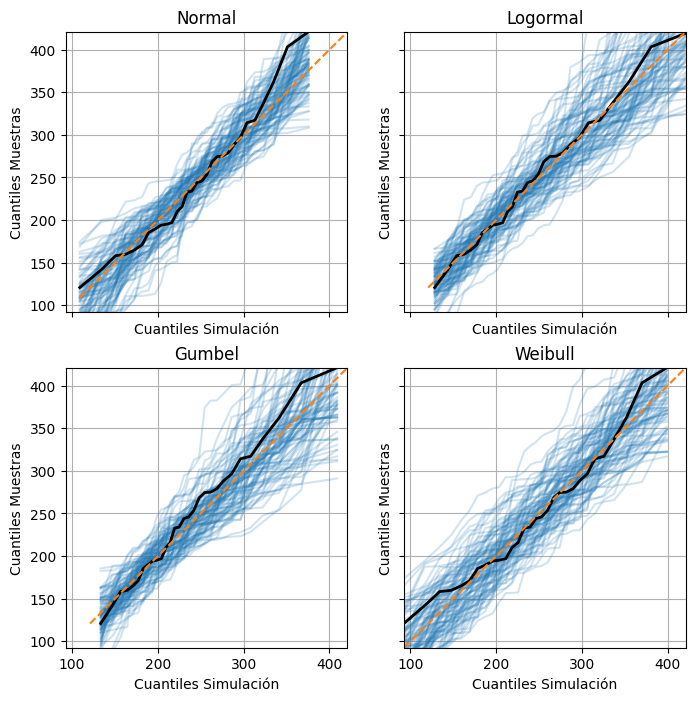

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,8),sharex=True,sharey=True)

# CODIGO DEL ALUMNO ============================================================











# ==============================================================================

plt.show()

**Su respuesta**:

##### Actividad 11

Alguna de estas cosas que podemos tratar de ver visualmente podemos cuantificarlas a través de la BPV (bayesian p-values) que, dicho de otra manera, es la probabilidad de haber visto la propiedad de mis datos en el ensayo (valor medio, desvío, simetría) considerando réplicas de ese ensayo con el modelo ajustado.

**Actividad**: Analice la BPV para el valor medio de los datos según cada modelo, utilizando la función `plot_bpv` de `arviz`. ¿Hay algún modelo con dificultades para replicar esta estadística?

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,8),sharex=True)

# CODIGO DEL ALUMNO ============================================================













# ==============================================================================
plt.show()

**Su respuesta**:

##### Actividad 12

**Actividad**: Repita para la asimetría (skew) de la distribución. ¿Nota que alguna distribución no logra representar la asimetría de los datos? ¿Eso lo veia en los gráficos de la actividad 9 o 10? *Explique*

NOTA: La función para calcular la asimetría es `st.skew(x,axis=-1,bias=False)` de la librería `scipy`

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,8),sharex=True)
from scipy import stats as st

# CODIGO DEL ALUMNO ============================================================































# ==============================================================================
plt.show()

**Su respuesta**:

##### Actividad 11

**Actividad**: Dado lo evaluado anteriormente, ¿con qué modelo se quedaría?

Guarde en un vector `y_post` las simulaciones del modelo seleccionado.

In [ ]:
# CODIGO DEL ALUMNO ============================================================
y_post =
# ==============================================================================

###Periodo de Retorno

Habiendo elegido el modelo, lo que falta ahora es definir la lluvia mensual asociada a un período de retorno de 100 años (es decir, la lluvia mensual que ocurre en promedio una vez cada 100 años). El período de retorno $T(x)$ es, entonces, el tiempo promedio $T$ entre eventos que superan determinado valor de la variable $x$:

$$T(x) = \frac{1}{1-p(X\leq x)}$$

El proceso entonces es
1. Hallar la probabilidad de excedencia asociada a un período de retorno de 100 años `p_100`.
2. Hallar la lluvia con esa probabilidad de excedencia en base a los datos simulados.

##### Actividad 12

**Actividad**: Obtenga la lluvia mensual con un período de retorno de 100 años en CABA. Indique la probabilidad de excedencia asociada en un determinado año.

In [ ]:
T = 100

# CODIGO DEL ALUMNO ============================================================
p_100 =
mm_100 =
# ==============================================================================

print('La probabilidad de excedencia es',p_100)
print('La Lluvia Mensual con período de retorno de 100 años es de',mm_100,'mm')

La probabilidad de excedencia es 0.01
La Lluvia Mensual con período de retorno de 100 años es de 505.57913330955535 mm


## Avance del TP Integrador

Al momento de la entrega del Trabajo Práctico 2, el grupo ya debiera haber recibido feedback de los docentes respecto a su dataset, el objetivo del trabajo y las visualizaciones realizadas en el Trabajo Práctico 1. El objetivo en este momento es plasmar todas las correcciones y propuestas de mejora y presentar un Análisis Exploratorio acabado del proyecto.

**Actividad**: Modificar y/o completar el análisis exploratorio de dato en función de lo discutido con los docentes, y comenzar a plantear la estrategia a utilizar para responder su pregunta de interés (qué tipo de modelo se espera construir, y cómo este podría ayudar a contestar su pregunta).

Pueden pensar en las siguientes preguntas para su entrega:

- ¿Cómo se realizó la limpieza del dataset?
- ¿Qué razonamiento se utilizó para limpiar y emprolijar el dataset?
- ¿Qué relación esperable o potencial hay entre las variables del dataset y la pregunta de interés?

Saque algunas conclusiones o información que pueda servir para futuras entregas.

- ¿Por qué proponen utilizar determinados modelos?
- ¿Qué desafíos podrían encuentrar en la inferencia y comparación de cada modelo?
- ¿Qué rol tienen las variables del dataset en cada modelo propuesto?
- ¿Cómo puede su modelo aportar información para contestar su pregunta de interés? ¿Qué tipo de análisis realizaría?

**Su respuesta**:

# Entrega del Trabajo Práctico

Para la entrega del TP2, siga los siguientes pasos:
1. Vuelva a correr el Colab desde 0 para asegurar que no haya ningún bug y todo funcione tal como se desea (`Disconnect and delete runtime`,`run all`)
2. Revise que todos los resultados estén presentes y como ustedes esperaban.
3. Asegúrese haber contestado todas la preguntas que requieren prosa.
4. Descargue el arcihvo .ipynb en su computadora
5. Incluya en la entrega el archivo generado como dataset en QGIS (las nuevas capas que haya creado o editado).

Revise que está todo como les gusta y ¡ya está listo! Ustedes son responables de que la entrega refleje sus intenciones, más allá de que nosotros podamos correr su archivo para revisar.

Los datos presentados abajo intentan ser para ustedes (y para nosotros) una verificación de que efectivamente han hecho la revisión final.

In [ ]:
print('Inicio de corrida: ',start_datetime)

end_datetime = datetime.datetime.now()
print('Fin de corrida: ',end_datetime)

elapsed_time = end_datetime-start_datetime
print('Tiempo de ejecución: ',round(elapsed_time.total_seconds()/60,1),'minutos')

Inicio de corrida:  2024-09-12 17:44:09.836007
Fin de corrida:  2024-09-12 17:46:21.680907
Tiempo de ejecución:  2.2 minutos
